In [1]:
### IMPORTS
import os
import glob
import json
#import util

import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
from torch.autograd import Variable
import torch.nn.init as init

from collections import defaultdict
from collections import Counter

from datetime import datetime

import SimpleITK as sitk

In [2]:
# all the model architecture information is in the plans.json file:
plans_json_path = r'C:\Users\Leo\Documents\UHN-MedImg3D-ML-quiz\nnUNet_results\Dataset001_Pancreas\nnUNetTrainer__nnUNetPlans__2d\plans.json'

# the model files:
saved_model_path = r'C:\Users\Leo\Documents\UHN-MedImg3D-ML-quiz\nnUNet_results\Dataset001_Pancreas\nnUNetTrainer__nnUNetPlans__2d\fold_0\checkpoint_final.pth'

saved_model_paths = [saved_model_path.replace('fold_0', 'fold_' + str(i)) for i in range(5)]



In [3]:
#pickle = torch.load(saved_model_path, weights_only = False)

#network_weights = pickle['network_weights']

#for key, value in pickle.items():
#    print(key)

In [7]:
#for key, value in pickle['logging'].items():
#    print(key)



mean_fg_dice
ema_fg_dice
dice_per_class_or_region
train_losses
val_losses
lrs
epoch_start_timestamps
epoch_end_timestamps


In [17]:
#for key, value in pickle['logging']['dice_per_class_or_region'].items():
#    print(key)



     train pancreas dice  train lesion dice
0               0.474920           0.000000
1               0.633061           0.000000
2               0.727856           0.000000
3               0.738956           0.522162
4               0.759710           0.528771
..                   ...                ...
170             0.912466           0.819403
171             0.906472           0.824269
172             0.913015           0.817304
173             0.904498           0.832460
174             0.910076           0.855373

[175 rows x 2 columns]


In [4]:
for i, saved_model_path in enumerate(saved_model_paths):
    print(saved_model_path)

C:\Users\Leo\Documents\UHN-MedImg3D-ML-quiz\nnUNet_results\Dataset001_Pancreas\nnUNetTrainer__nnUNetPlans__2d\fold_0\checkpoint_final.pth
C:\Users\Leo\Documents\UHN-MedImg3D-ML-quiz\nnUNet_results\Dataset001_Pancreas\nnUNetTrainer__nnUNetPlans__2d\fold_1\checkpoint_final.pth
C:\Users\Leo\Documents\UHN-MedImg3D-ML-quiz\nnUNet_results\Dataset001_Pancreas\nnUNetTrainer__nnUNetPlans__2d\fold_2\checkpoint_final.pth
C:\Users\Leo\Documents\UHN-MedImg3D-ML-quiz\nnUNet_results\Dataset001_Pancreas\nnUNetTrainer__nnUNetPlans__2d\fold_3\checkpoint_final.pth
C:\Users\Leo\Documents\UHN-MedImg3D-ML-quiz\nnUNet_results\Dataset001_Pancreas\nnUNetTrainer__nnUNetPlans__2d\fold_4\checkpoint_final.pth


In [5]:
log_df = pd.DataFrame()

for i, saved_model_path in enumerate(saved_model_paths):
    pickle = torch.load(saved_model_path, weights_only = False)

    network_weights = pickle['network_weights']    # all of the weights are here

    #print(train_dice_df)

    logging = pickle['logging']   # the dice scores and training/val loss are here

    
    temp_df = pd.DataFrame(logging['dice_per_class_or_region'], columns =['train pancreas dice ' + str(i), 'train lesion dice ' + str(i)]) 
    train_losses = logging['train_losses']
    val_losses = logging['val_losses']

    temp_df['train loss ' + str(i)] = train_losses
    temp_df['val loss '+ str(i)] = val_losses

    log_df = pd.concat([log_df, temp_df], axis=1)
    #save the train and val losses to a csv file to plot




In [6]:
log_csvpath = r'C:\Users\Leo\OneDrive\Documents\GitHub\WangLabQuiz\csv files\segmentation_training_log_2D.csv'   # csv with the image dimensions, image and mask file paths

log_df.to_csv(log_csvpath)
    
print(log_df)

     train pancreas dice 0  train lesion dice 0  train loss 0  val loss 0  \
0                 0.000000             0.000000      0.220509    0.043089   
1                 0.593729             0.000000     -0.104620   -0.259590   
2                 0.721693             0.614747     -0.346984   -0.498235   
3                 0.746033             0.648102     -0.545828   -0.551511   
4                 0.763044             0.635273     -0.603347   -0.566553   
..                     ...                  ...           ...         ...   
195               0.854635             0.674459     -0.935620   -0.647073   
196               0.854424             0.681332     -0.934962   -0.653173   
197               0.855201             0.670109     -0.935489   -0.643297   
198               0.857803             0.681789     -0.935493   -0.658993   
199               0.854731             0.683530     -0.936046   -0.650236   

     train pancreas dice 1  train lesion dice 1  train loss 1  val loss 1  

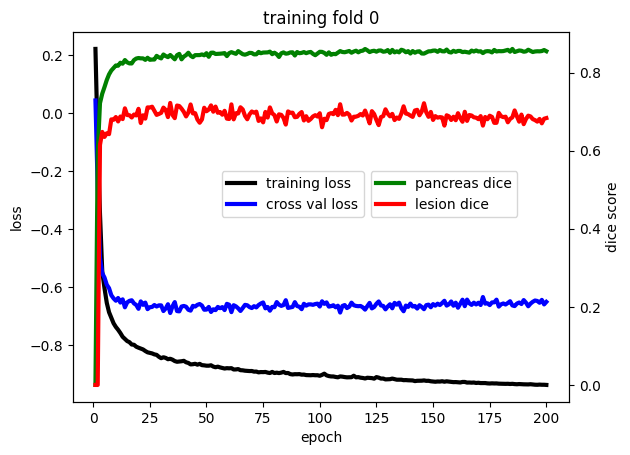

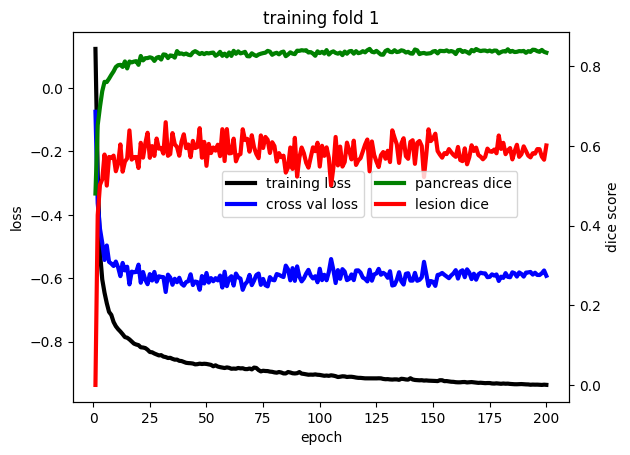

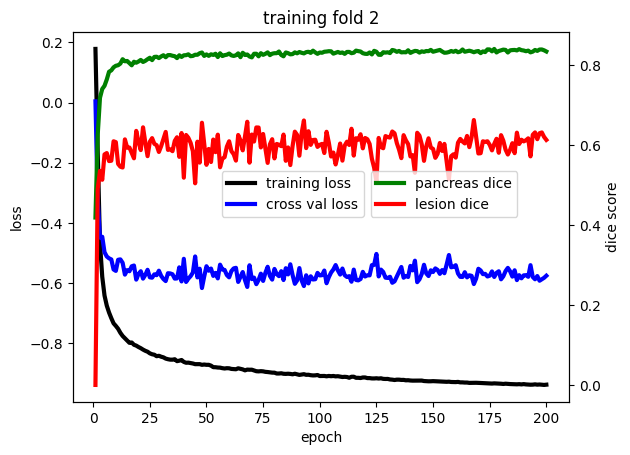

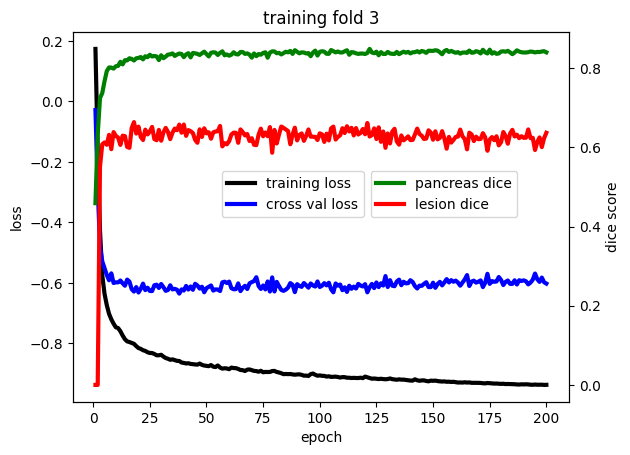

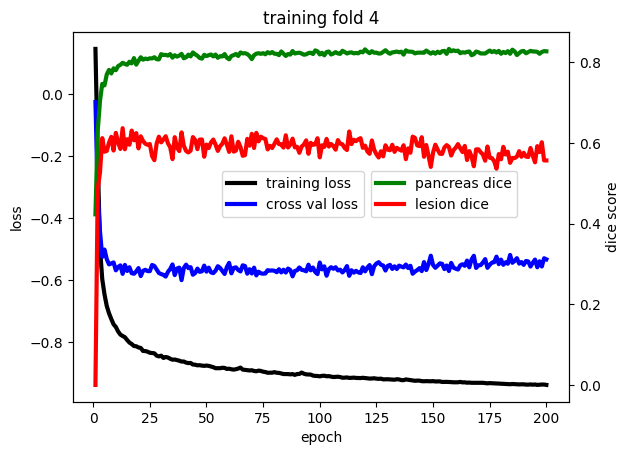

In [7]:
def plot_training_curves(train_loss, val_loss, pancreas_dice, lesion_dice, fold):
        epochs = log_df.index.values + 1
              
        #sns.set(font_scale=2.5)
        #fig, ax_all = plt.subplots(3, 1, figsize=(30, 54))
        plt.figure()
        ax = plt.axes()  #figsize=(30, 54))
        ax.set_title('training fold ' + str(fold))
        ax2 = ax.twinx()

        x_values = epochs
        #ax.plot(x_values, self.my_fantastic_logging['train_losses'][:epoch + 1], color='b', ls='-', label="training loss", linewidth=4)
        ax.plot(x_values, train_loss, color='k', ls='-', label="training loss", linewidth=3)
        ax.plot(x_values, val_loss, color='b', ls='-', label="cross val loss", linewidth=3)
        ax2.plot(x_values, pancreas_dice, color='g', ls='-', label="pancreas dice",
                 linewidth=3)
        ax2.plot(x_values, lesion_dice, color='r', ls='-', label="lesion dice",
                 linewidth=3)
        ax.set_xlabel("epoch")
        ax.set_ylabel("loss")
        ax2.set_ylabel("dice score")
        ax.legend(loc=(0.3, 0.5))
        ax2.legend(loc=(0.6, 0.5))


for i in range(5):
    train_loss = log_df['train loss ' + str(i)]
    val_loss = log_df['val loss ' + str(i)]

    pancreas_dice = log_df['train pancreas dice ' + str(i)]
    lesion_dice = log_df['train lesion dice ' + str(i)]

    plot_training_curves(train_loss, val_loss, pancreas_dice, lesion_dice, i)

In [39]:
print(log_df.index.values + 1)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
